In [ ]:
import pandas as pd

# URL of the dataset in the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Define column names for the dataset
columns = ["buying", "maint", "doors","persons" ,"lug_boot","safety","class"]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None, names=columns)

# Print the first few rows of the dataset
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Check for missing values and impute them

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [ ]:
df.isna().sum().sum()


0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
# categorical features and encode them
# cols= ["buying","persons" ,"lug_boot","safety"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
  df[i]=le.fit_transform(df[i])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
df.tail()


,buying,maint,doors,persons,lug_boot,safety,class
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1
1727,1,1,3,2,0,0,3


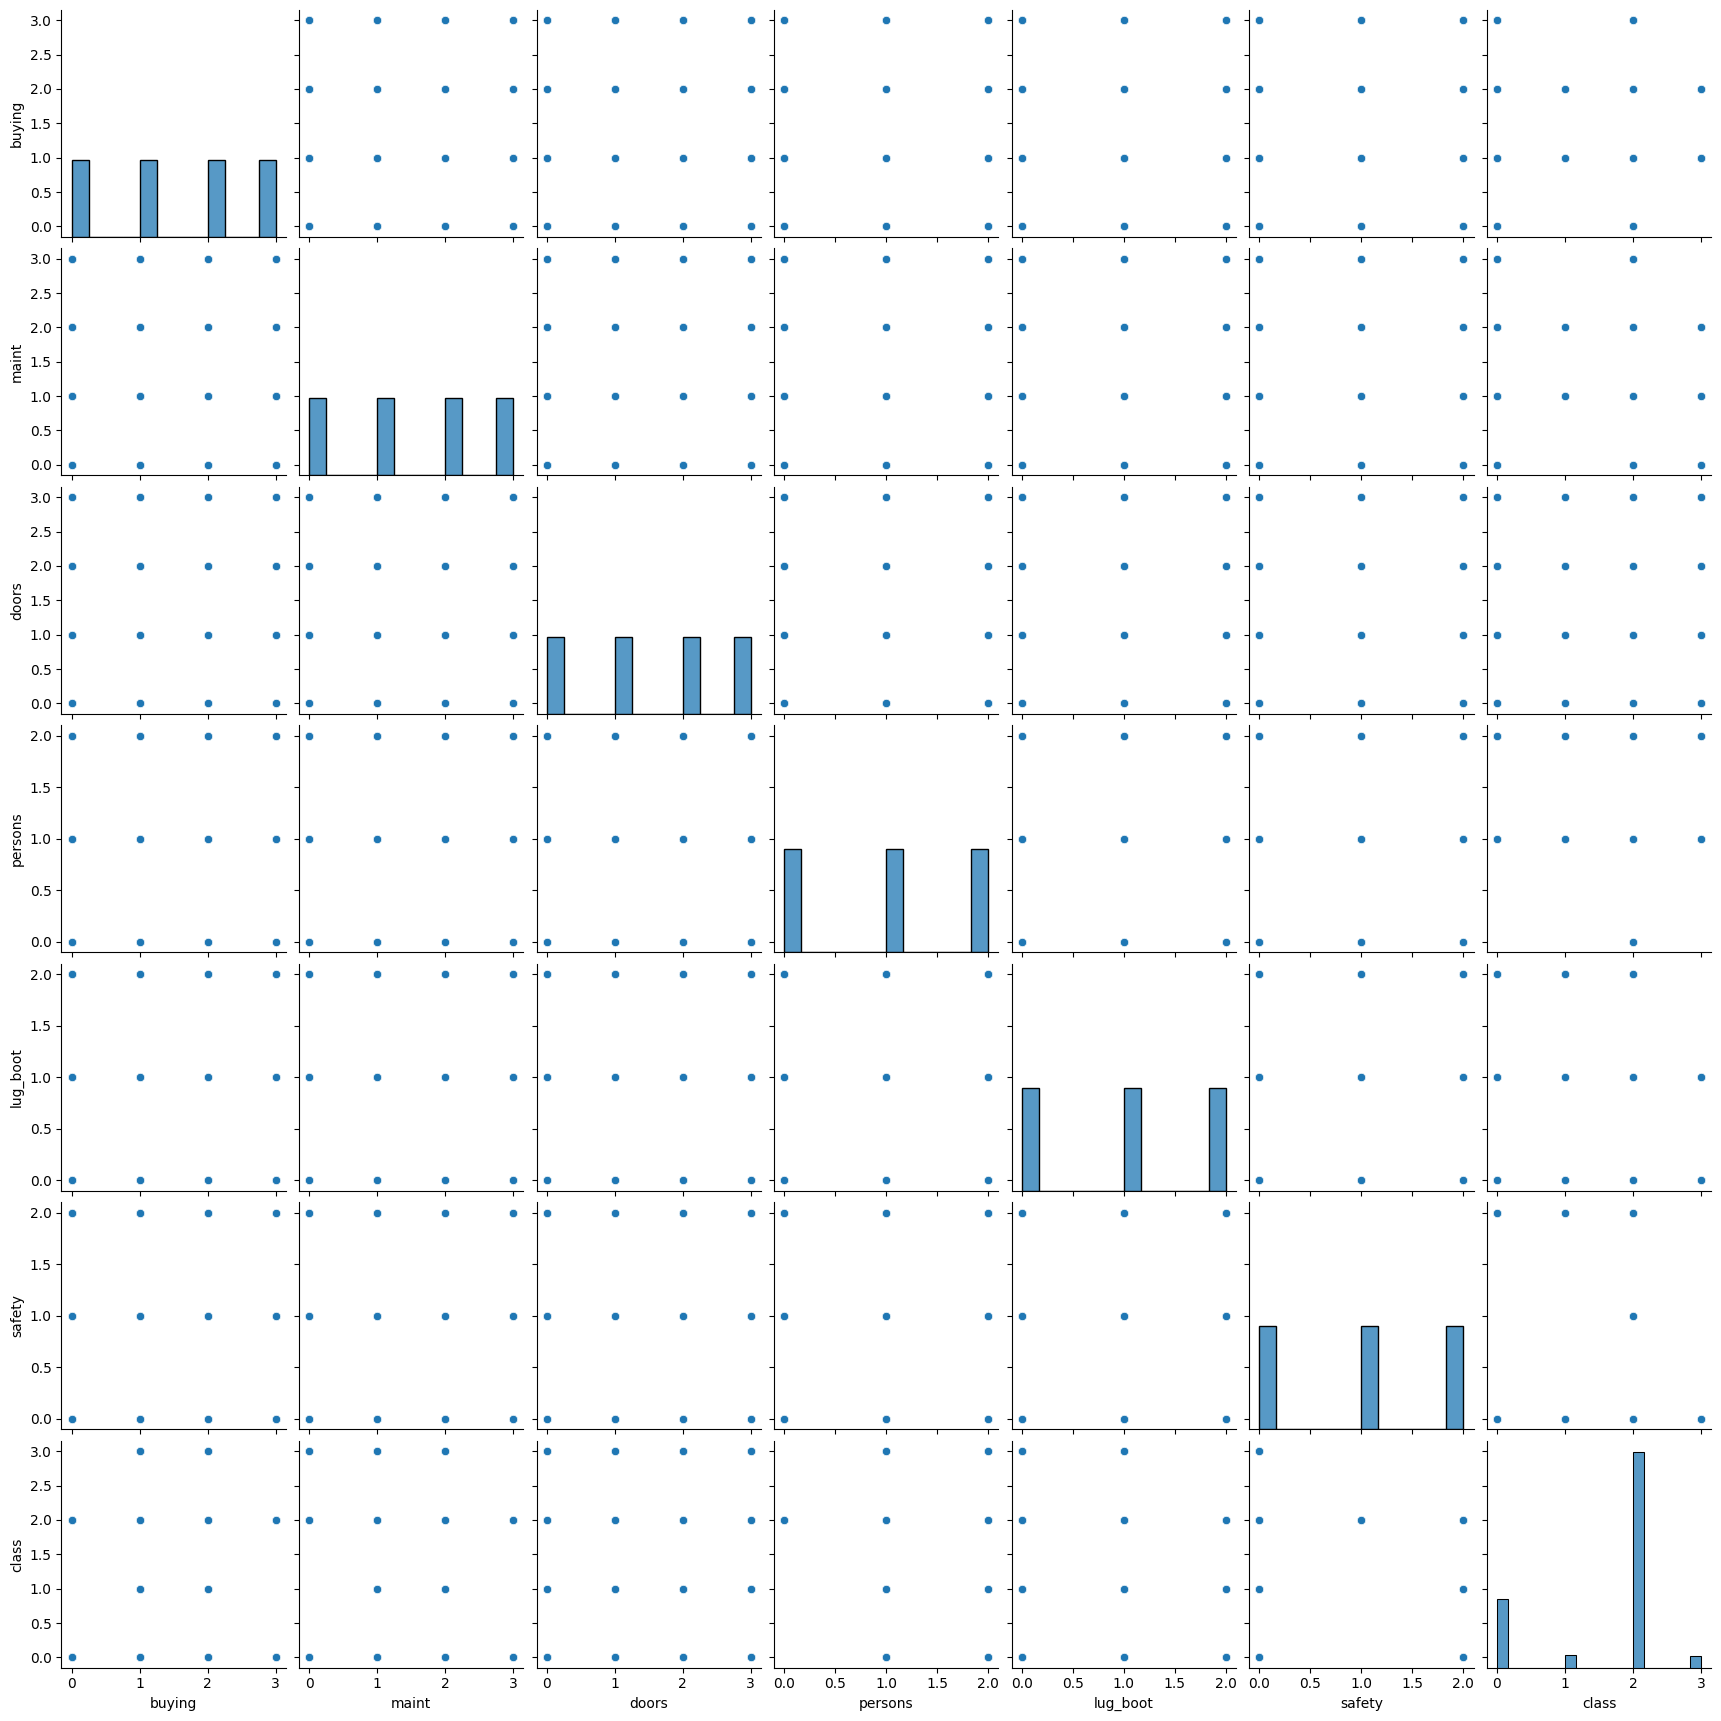

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=df.columns
sns.pairplot(df[cols])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Scale the numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
df


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Create model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rfc.fit(X_train, y_train)

# Make predictions
y_pred1 = rfc.predict(X_test)
train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

# Evaluate accuracy
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
print(confusion_matrix1)
print("Training accuracy: ", accuracy_score(train_pred, y_train))
print("Testing accuracy: ", accuracy_score(test_pred, y_test))


[[109   7   1   1]
 [  2  17   0   0]
 [  3   0 355   0]
 [  3   0   0  21]]
Training accuracy:  1.0
Testing accuracy:  0.9672447013487476


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for model 1
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1, average='weighted', zero_division=0)
recall1 = recall_score(y_test, y_pred1, average='weighted', zero_division=0)
f1_score1 = f1_score(y_test, y_pred1, average='weighted', zero_division=0)
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
print("RandomForestClassifier - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy1, precision1, recall1, f1_score1))

RandomForestClassifier - Accuracy: 0.967, Precision: 0.970, Recall: 0.967, F1 Score: 0.968


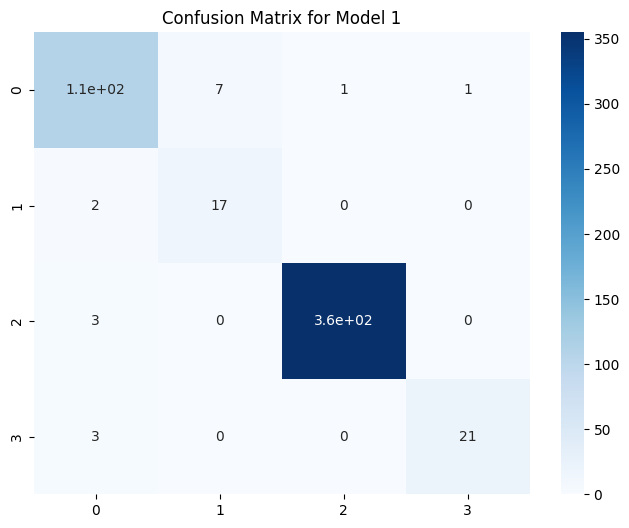

In [ ]:
# Plot the confusion matrix for each model
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix1, annot=True, cmap="Blues")
plt.title("Confusion Matrix for Model 1")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Make predictions
y_pred2 = lr.predict(X_test)
train_pred = lr.predict(X_train)
test_pred=lr.predict(X_test)

# Evaluate mean squared error
train_mse = mean_squared_error(y_train, train_pred)
print("Training MSE:", train_mse)
test_mse = mean_squared_error(y_test, test_pred)
print("Testing MSE:", test_mse)
# mse = mean_squared_error(y_test, y_pred)
# print("Linear Regression MSE:", mse)


Training MSE: 0.6781615001212931
Testing MSE: 0.7338410712893653


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse1 = mean_squared_error(y_test, y_pred2)
r2_score1 = r2_score(y_test, y_pred2)
rmse1 = np.sqrt(mse1)
print("LinearRegression - Mean Squared Error: {:.3f}, R-squared: {:.3f}, Root Mean Squared Error: {:.3f}".format(mse1, r2_score1, rmse1))

LinearRegression - Mean Squared Error: 0.734, R-squared: 0.076, Root Mean Squared Error: 0.857


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Create model
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train, y_train)

# Make predictions
y_pred3 = knn.predict(X_test)

# Evaluate accuracy (for classification) or mean squared error (for regression)
if isinstance(knn, KNeighborsClassifier):
    acc = accuracy_score(y_test, y_pred3)
    print("KNN Classification Accuracy:", acc)
else:
    mse = mean_squared_error(y_test, y_pred3)
    print("KNN Regression MSE:", mse)


KNN Classification Accuracy: 0.9364161849710982


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy2 = accuracy_score(y_test, y_pred3)
precision2 = precision_score(y_test, y_pred3, average='weighted', zero_division=0)
recall2 = recall_score(y_test, y_pred3, average='weighted', zero_division=0)
f1_score2 = f1_score(y_test, y_pred3, average='weighted', zero_division=0)
confusion_matrix2 = confusion_matrix(y_test, y_pred3)
print("KNeighborsClassifier - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy2, precision2, recall2, f1_score2))

KNeighborsClassifier - Accuracy: 0.936, Precision: 0.938, Recall: 0.936, F1 Score: 0.933


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create model
svc = SVC(kernel='linear', C=1, random_state=42)

# Train model
svc.fit(X_train, y_train)

# Make predictions
y_pred4=svc.predict(X_test)
train_pred=svc.predict(X_train)
test_pred=svc.predict(X_test)

# Evaluate accuracy
print("Training accuracy: ", accuracy_score(train_pred, y_train))
print("Testing accuracy: ", accuracy_score(test_pred, y_test))


Training accuracy:  0.7303556658395368
Testing accuracy:  0.7090558766859345


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy3 = accuracy_score(y_test, y_pred4)
precision3 = precision_score(y_test, y_pred4, average='weighted', zero_division=0)
recall3 = recall_score(y_test, y_pred4, average='weighted', zero_division=0)
f1_score3 = f1_score(y_test, y_pred4, average='weighted', zero_division=0)
confusion_matrix3 = confusion_matrix(y_test, y_pred4)
print("SVc - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy3, precision3, recall3, f1_score3))

SVc - Accuracy: 0.709, Precision: 0.611, Recall: 0.709, F1 Score: 0.619


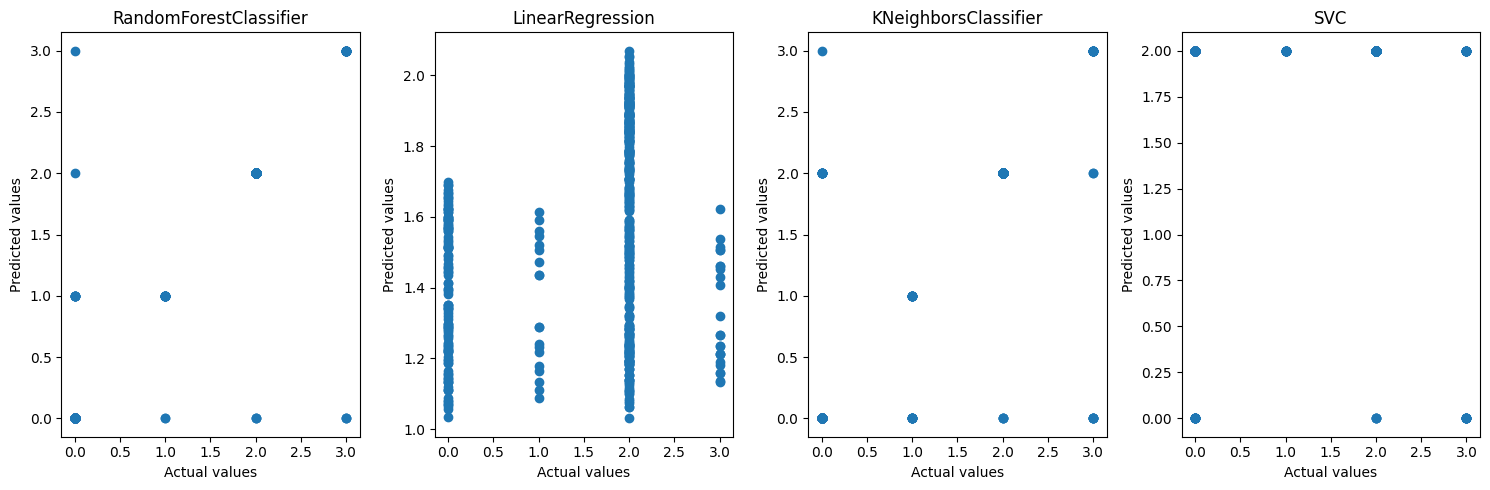

In [ ]:
models = ['RandomForestClassifier','LinearRegression','KNeighborsClassifier','SVC' ]
y_preds = [y_pred1,y_pred2,y_pred3,y_pred4]
# Plot the predicted vs actual values for each model
plt.figure(figsize=(15,5))
for i, y_pred in enumerate(y_preds):
    plt.subplot(1, 4, i+1)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(models[i])
plt.tight_layout()
plt.show()

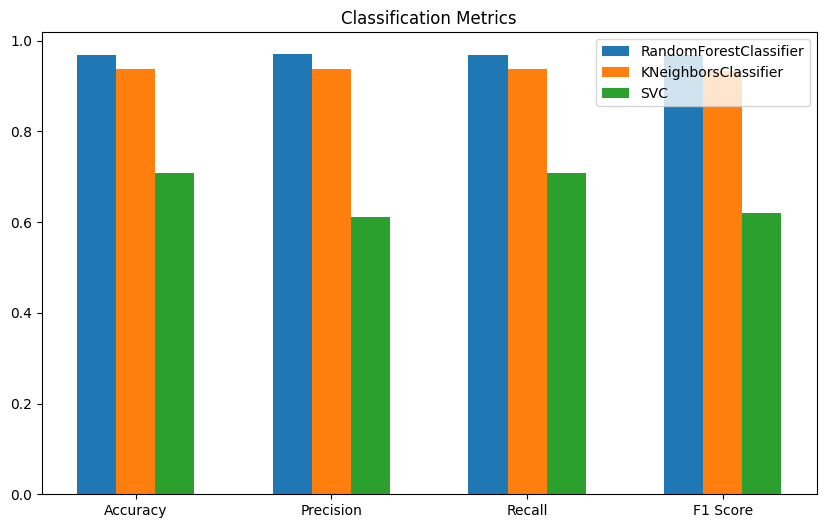

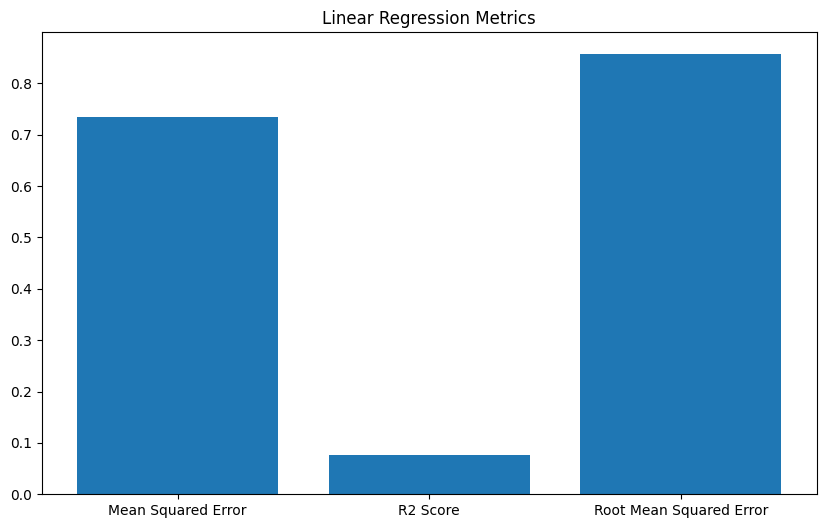

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the evaluation metrics for each model
x_ticks = np.arange(4)
model1_scores = [accuracy1, precision1, recall1, f1_score1]
model2_scores = [accuracy2, precision2, recall2, f1_score2]
model3_scores = [accuracy3, precision3, recall3, f1_score3]

bar_width = 0.2
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_ticks, model1_scores, width=bar_width, label='RandomForestClassifier')
ax.bar(x_ticks + bar_width, model2_scores, width=bar_width, label='KNeighborsClassifier')
ax.bar(x_ticks + 2*bar_width, model3_scores, width=bar_width, label='SVC')

ax.set_xticks(x_ticks + bar_width)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
ax.set_title('Classification Metrics')
ax.legend()
# for LR
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(['Mean Squared Error', 'R2 Score', 'Root Mean Squared Error'], [mse1, r2_score1, rmse1])
ax.set_title('Linear Regression Metrics')
plt.show()

**HYEPRPARAMETER TUNING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.9685744658962312


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a K-Nearest Neighbors Classifier object
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.9098487706182915


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a Support Vector Machine Classifier object
svc = SVC(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9760159116628373


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create a Linear Regression object
lr = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
Best score:  0.08596640102256939
